# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [21]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

610


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
#Creating lists to hold values to later populate dataframe
lats = []
lons = []
max_temps = []
humidities = []
clouds = []
wind_speeds = []
countries =  []
dates = []
skip_counter = 0

#Beginning of print process
print("Beginning Data Retrieval")
print("------------------------------")

#Loop through each city in cities and generate json link to pull data
for name in cities:
    weather_url = f"https://api.openweathermap.org/data/2.5/weather?q={name}&appid={weather_api_key}&units=imperial"
    response = requests.get(weather_url).json()

    #Catch exception in case no data found for selected city
    try:
        #Store data into variables
        lat = response["coord"]["lat"]
        lon = response["coord"]["lon"]
        max_temp = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]
        wind_speed = response["wind"]["speed"]
        country = response["sys"]["country"]
        date = response["dt"]

        #Append data to corresponding lists
        lats.append(lat)
        lons.append(lon)
        max_temps.append(max_temp)
        humidities.append(humidity)
        clouds.append(cloudiness)
        wind_speeds.append(wind_speed)
        countries.append(country)
        dates.append(date)

        #Print log of city being processed
        print(f"Processing record {cities.index(name)} | {name.capitalize()}")
        print(f"Data visual: {len(lats)}\n")
    except KeyError:
        print(f"No data found for {name.capitalize()}. Skipping...")

        #Remove city from cities list for easier dataframe creation later
        lats.append("")
        lons.append("")
        max_temps.append("")
        humidities.append("")
        clouds.append("")
        wind_speeds.append("")
        countries.append("")
        dates.append("")
        print(f"Data visual: {len(lats)}\n")
        skip_counter += 1

#End of print process
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

print(f"Number of Skips: {skip_counter}")

ecord 224 | Batagay
Data visual: 225

Processing record 225 | Codrington
Data visual: 226

Processing record 226 | Henties bay
Data visual: 227

Processing record 227 | Abonnema
Data visual: 228

Processing record 228 | Bilibino
Data visual: 229

Processing record 229 | Lourdes
Data visual: 230

Processing record 230 | Nelson bay
Data visual: 231

Processing record 231 | Hobyo
Data visual: 232

Processing record 232 | Broome
Data visual: 233

Processing record 233 | Sept-iles
Data visual: 234

Processing record 234 | Sao filipe
Data visual: 235

Processing record 235 | Beyneu
Data visual: 236

Processing record 236 | Sakakah
Data visual: 237

Processing record 237 | Alice springs
Data visual: 238

No data found for Ruatoria. Skipping...
Data visual: 239

Processing record 239 | Rocha
Data visual: 240

Processing record 240 | Bilma
Data visual: 241

No data found for Tabiauea. Skipping...
Data visual: 242

Processing record 242 | Hobart
Data visual: 243

Processing record 243 | Aasiaat


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
#Create dataframe
raw_data = {"City": cities, "Lat": lats, "Lon": lons, "Max Temp": max_temps, "Humidity": humidities, "Cloudiness": clouds, "Wind Speed": wind_speeds, "Country": countries, "Date": dates}

city_data = pd.DataFrame(raw_data)

#Find indexes where Lat is blank for future removal
index_names = city_data[city_data["Lat"] == ""].index

city_data.drop(index_names, inplace = True)

#Export dataframe to a csv file
city_data.to_csv("../output_data/cities.csv", index = False, header = True)

#Print out cleaned dataframe
city_data

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lucea,18.45,-78.17,81,78,40,6.93,JM,1602792265
1,castro,-24.79,-50.01,64.87,93,98,6.33,BR,1602792265
2,naze,28.37,129.48,73.4,78,14,3.36,JP,1602792265
3,yar-sale,66.83,70.83,31.55,94,97,11.88,RU,1602792265
4,bitung,1.45,125.18,73.4,100,40,2.77,ID,1602792266
...,...,...,...,...,...,...,...,...,...
605,cravo norte,6.3,-70.2,90.46,56,83,3.13,CO,1602792453
606,margate,51.38,1.39,52,82,79,1.99,GB,1602792454
607,olafsvik,64.89,-23.71,47.43,72,98,8.88,IS,1602792454
608,ucluelet,48.93,-125.55,54,87,75,6.93,CA,1602792165


In [25]:
#Find cities where the humidity is over 100
over_100 = city_data.loc[city_data["Humidity"] > 100]

over_100
#Note: if blank, then no cities had humidity over 100

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
#  Get the indices of cities that have humidity over 100%.
humid_index = city_data[city_data["Humidity"] > 100].index
humid_index

Int64Index([], dtype='int64')

In [27]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(humid_index, inplace = False)

clean_city_data

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lucea,18.45,-78.17,81,78,40,6.93,JM,1602792265
1,castro,-24.79,-50.01,64.87,93,98,6.33,BR,1602792265
2,naze,28.37,129.48,73.4,78,14,3.36,JP,1602792265
3,yar-sale,66.83,70.83,31.55,94,97,11.88,RU,1602792265
4,bitung,1.45,125.18,73.4,100,40,2.77,ID,1602792266
...,...,...,...,...,...,...,...,...,...
605,cravo norte,6.3,-70.2,90.46,56,83,3.13,CO,1602792453
606,margate,51.38,1.39,52,82,79,1.99,GB,1602792454
607,olafsvik,64.89,-23.71,47.43,72,98,8.88,IS,1602792454
608,ucluelet,48.93,-125.55,54,87,75,6.93,CA,1602792165


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

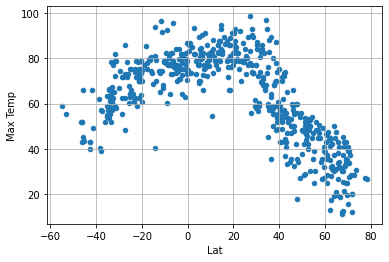

In [28]:
#Creation of plot and subsequent axis titles
lat_vs_temp = clean_city_data.plot(kind = "scatter", x = "Lat", y = "Max Temp", grid = True)
plt.xlabel = "Latitude"
plt.ylabel = "Max Temperature (F)"
plt.title = "Latitude vs Max Temp (F)"

#Save plot as image to output_data folder
plt.savefig = "../output_data/Latitude vs Max Temp.png"
plt.show()

## Latitude vs. Humidity Plot

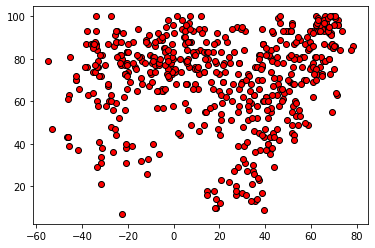

In [29]:
#Creation of plot and subsequent axis titles
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker = "o", facecolors = "red", edgecolors = "black")
plt.title = "Latitude vs Humidity"
plt.xlabel = "Latitude"
plt.ylabel ="Humidity"

#Save plot as image to output_data folder
plt.savefig = "Latitude vs Humidity.png"
plt.show()

## Latitude vs. Cloudiness Plot

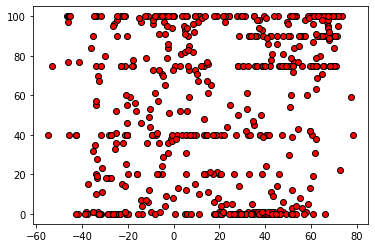

In [30]:
#Creation of plot and subsequent axis titles
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker = "o", facecolors = "red", edgecolors = "black")
plt.title = "Latitude vs Cloudiness"
plt.xlabel = "Latitude"
plt.ylabel = "Cloudiness"

#Save plot as image to output_data folder
plt.savefig = "../output_data/Latitude vs Cloudiness.png"
plt.show() 

## Latitude vs. Wind Speed Plot

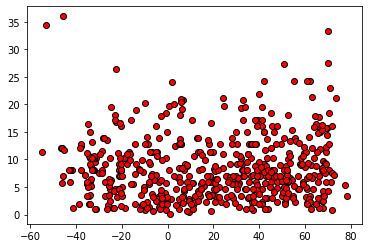

In [31]:
#Creation of plot and subsequent axis titles
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker = "o", facecolors = "red", edgecolors = "black")
plt.title = "Latitude vs Wind Speed"
plt.xlabel = "Latitude"
plt.ylabel = "Wind Speed"

#Save plot as image to output_data folder
plt.savefig = "../output_data/Latitude vs Wind Speed.png"
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6737071838787997


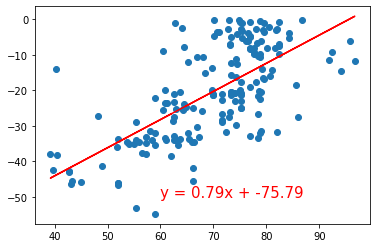

In [32]:
#Create a new dataframe that has cities only in the Northern Hemisphere
north_index = clean_city_data[clean_city_data["Lat"] > 0].index
north_city_data = clean_city_data.drop(north_index, inplace= False)

#Set x and y values to appropriate data from dataframe
x_values = north_city_data["Max Temp"]
y_values = north_city_data["Lat"]

#Create the linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot data
print(f"The r-value is: {rvalue}")
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

#Creation of axis titles
plt.annotate(line_eq, (60, -50), fontsize = 15, color = "red")
plt.title = "Max Temp vs. Latitude (Northern Hemisphere)"
plt.xlabel = "Max Temp (F)"
plt.ylabel = "Latitude"
plt.savefig = "../output_data/Max Temp vs Latitude (North Hemisphere).png"
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8653507526754675


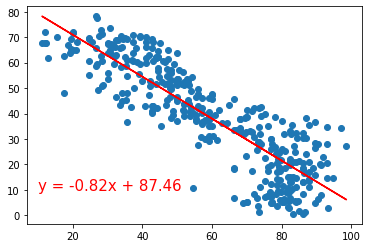

In [33]:
#Create a new dataframe that has cities only in the Southern Hemisphere
south_index = clean_city_data[clean_city_data["Lat"] < 0].index
south_city_data = clean_city_data.drop(south_index, inplace = False)

#Set x and y values to appropriate data from dataframe
x_values = south_city_data["Max Temp"]
y_values = south_city_data["Lat"]

#Create the linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot data
print(f"The r-value is: {rvalue}")
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

#Creation of axis titles
plt.annotate(line_eq, (10, 10), fontsize = 15, color = "red")
plt.title = "Max Temp vs. Latitude (Southern Hemisphere)"
plt.xlabel = "Max Temp (F)"
plt.ylabel = "Latitude"
plt.savefig = "../output_data/Max Temp vs Latitude (South Hemisphere)"
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2157596850743021


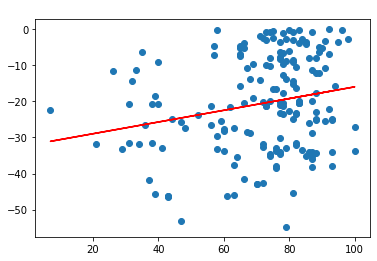

In [34]:
#Set x and y values to appropriate data from dataframe
x_values = north_city_data["Humidity"]
y_values = north_city_data["Lat"]

#Create the linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot data
print(f"The r-value is: {rvalue}")
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

#Creation of axis titles
plt.annotate(line_eq, (60, 3), fontsize = 15, color = "red")
plt.title = "Humidity (%) vs. Latitude (Northern Hemisphere)"
plt.xlabel = "Humidity"
plt.ylabel = "Latitude"
plt.savefig = "../output_data/Humidity vs Latitude (North Hemisphere).png"
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.22521892107287345


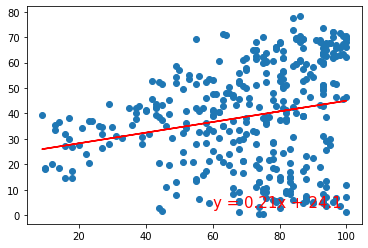

In [35]:
#Set x and y values to appropriate data from dataframe
x_values = south_city_data["Humidity"]
y_values = south_city_data["Lat"]

#Create the linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot data
print(f"The r-value is: {rvalue}")
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

#Creation of axis titles
plt.annotate(line_eq, (60, 3), fontsize = 15, color = "red")
plt.title = "Humidity (%) vs Latitude (Southern Hemisphere)"
plt.xlabel = "Humidity"
plt.ylabel = "Latitude"
plt.savefig = "../output_data/Humidity vs Latitude (South Hemisphere)"
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.14477541665198587


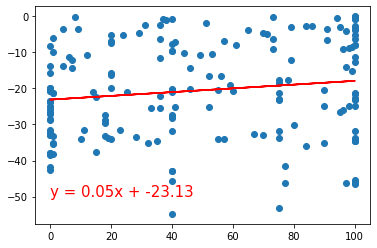

In [36]:
#Set x and y values to appropriate data from dataframe
x_values = north_city_data["Cloudiness"]
y_values = north_city_data["Lat"]

#Create the linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot data
print(f"The r-value is: {rvalue}")
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

#Creation of axis titles
plt.annotate(line_eq, (0, -50), fontsize = 15, color = "red")
plt.title = "Cloudiness (%) vs Latitude (Northern Hemisphere)"
plt.xlabel = "Cloudiness (%)"
plt.ylabel = "Latitude"
plt.savefig = "../output_data/Max Temp vs Latitude (North Hemisphere).png"
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.25668686857995404


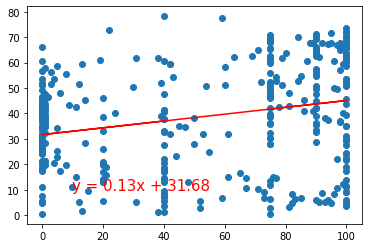

In [37]:
#Set x and y values to appropriate data from dataframe
x_values = south_city_data["Cloudiness"]
y_values = south_city_data["Lat"]

#Create the linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot data
print(f"The r-value is: {rvalue}")
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

#Creation of axis titles
plt.annotate(line_eq, (10, 10), fontsize = 15, color = "red")
plt.title = "Cloudiness (%) vs Latitude (Southern Hemisphere)"
plt.xlabel = "Max Temp (F)"
plt.ylabel = "Latitude"
plt.savefig = "../output_data/Cloudiness vs Latitude (South Hemisphere)"
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2316826998252607


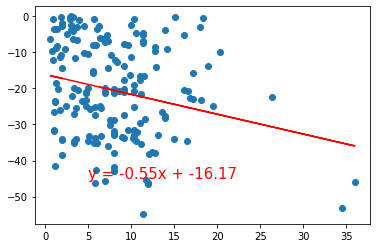

In [38]:
#Set x and y values to appropriate data from dataframe
x_values = north_city_data["Wind Speed"]
y_values = north_city_data["Lat"]

#Create the linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot data
print(f"The r-value is: {rvalue}")
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

#Creation of axis titles
plt.annotate(line_eq, (5, -45), fontsize = 15, color = "red")
plt.title = "Wind Speed (mph) vs. Latitude (Northern Hemisphere)"
plt.xlabel = "Wind Speed (mph)"
plt.ylabel = "Latitude"
plt.savefig = "../output_data/Wind Speed vs Latitude (North Hemisphere).png"
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.11411042253437526


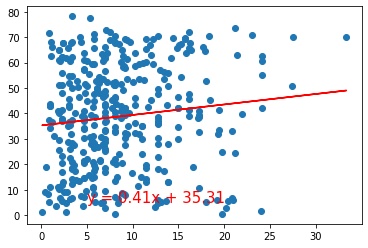

In [39]:
#Set x and y values to appropriate data from dataframe
x_values = south_city_data["Wind Speed"]
y_values = south_city_data["Lat"]

#Create the linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot data
print(f"The r-value is: {rvalue}")
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

#Creation of axis titles
plt.annotate(line_eq, (5, 5), fontsize = 15, color = "red")
plt.title = "Wind Speed (mph) vs. Latitude (Southern Hemisphere)"
plt.xlabel = "Wind Speed"
plt.ylabel = "Latitude"
plt.savefig = "../output_data/Wind Speed vs Latitude (South Hemisphere).png"
plt.show()